## Deutsch

In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, assemble, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulatorś
from qiskit.extensions import Initialize
from qiskit.tools.monitor import job_monitor
from qiskit.providers.ibmq import least_busy



provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


/tmp/ipykernel_80/2533484823.py:25: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  circuit += create_uf(x)


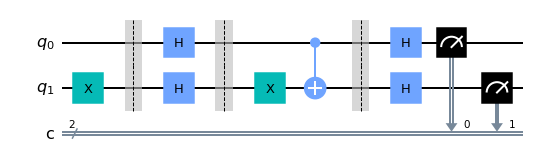

In [50]:
def create_uf(x):
    circuit = QuantumCircuit(2)
    if x == 0:
        pass
    if x == 1:
        circuit.cx(0, 1)
    if x == 2:
        circuit.x(1)
        circuit.cx(0, 1)
    if x == 3:
        circuit.x(1)
        
    return circuit


def deutsch(x):
    circuit = QuantumCircuit(2, 2)
    circuit.x(1)
    circuit.barrier()
    
    circuit.h(0)
    circuit.h(1)
    circuit.barrier()
    
    circuit += create_uf(x)
    circuit.barrier()
    
    circuit.h(0)
    circuit.h(1)
    
    circuit.measure(0, 0)
    circuit.measure(1, 1)
    
    return circuit

def simulate_deutsch(x):
    circuit = deutsch(x)
    
    aer_sim = Aer.get_backend('aer_simulator')
    transpiled = transpile(circuit, aer_sim)

    qobj = assemble(transpiled, aer_sim)
    results = aer_sim.run(qobj).result()
    answer = results.get_counts()

    return plot_histogram(answer)

def real_deustsh(x):
    circuit = deutsch(x)
    backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (3) and
                                       not x.configuration().simulator and x.status().operational==True))
    print("least busy backend: ", backend)
    

    transpiled = transpile(circuit, backend, optimization_level=3)
    job = backend.run(transpiled)
    job_monitor(job, interval=2)
    
    results = job.result()
    answer = results.get_counts()

    return plot_histogram(answer)    
    

deutsch(2).draw()

/tmp/ipykernel_80/1306459140.py:24: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  circuit += create_uf(x)


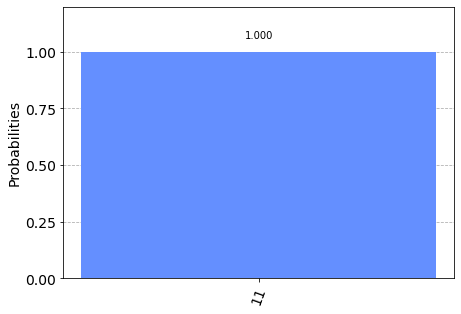

In [45]:
simulate_deutsch(2)

/tmp/ipykernel_80/3977189990.py:24: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  circuit += create_uf(x)


least busy backend:  ibmq_lima
Job Status: job has successfully run


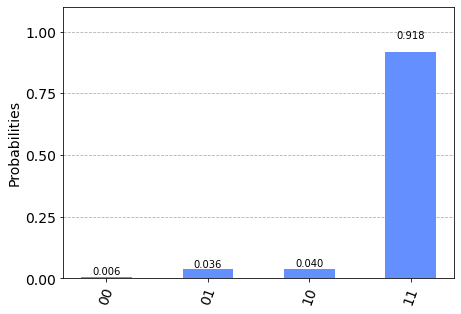

In [3]:
real_deustsh(2)

/tmp/ipykernel_80/3977189990.py:24: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  circuit += create_uf(x)


least busy backend:  ibmq_lima
Job Status: job has successfully run


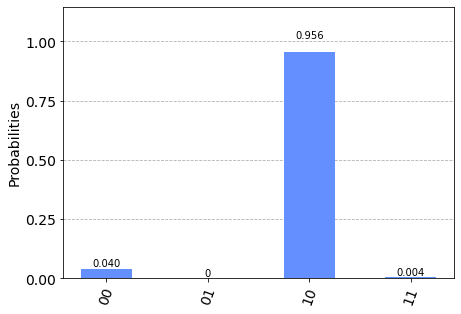

In [4]:
real_deustsh(0)

/tmp/ipykernel_80/1306459140.py:24: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  circuit += create_uf(x)


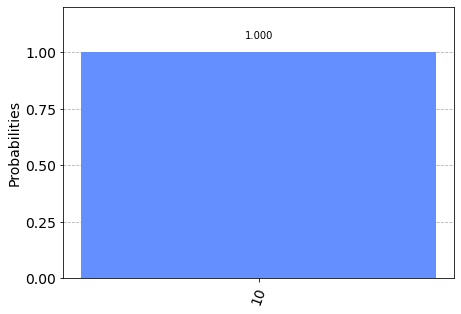

In [46]:
simulate_deutsch(0)

/tmp/ipykernel_80/3977189990.py:24: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  circuit += create_uf(x)


least busy backend:  ibmq_lima
Job Status: job has successfully run


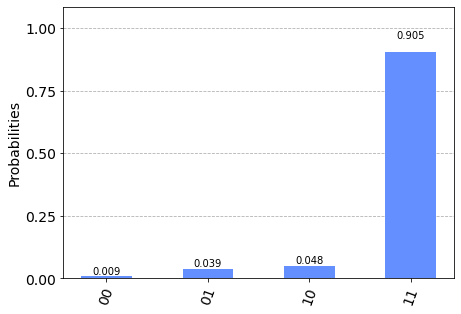

In [5]:
real_deustsh(1)

/tmp/ipykernel_80/3977189990.py:24: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  circuit += create_uf(x)


least busy backend:  ibmq_lima
Job Status: job has successfully run


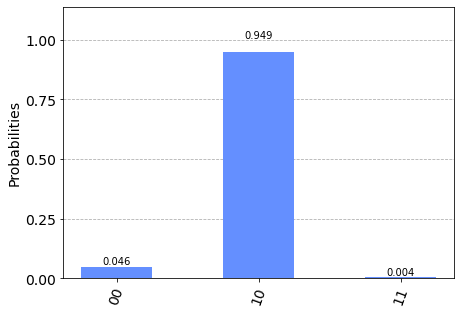

In [6]:
real_deustsh(3)

## Bernstein-Vazirani Algorithm

In [7]:
def fs(s):
    def f(x):
        return str(sum(map(lambda e: int(e[0]) * int(e[1]), zip(x, s))) % 2)
        
    return f

def classical_solution(n, f):
    guessed_s = []
    for i in range(n):
        x = list('0' * n)
        x[i] = '1'
        x = ''.join(x)
        guessed_s.append(f(x))
        
    print('s = ' + ''.join(guessed_s))
        
classical_solution(2, fs('10'))

s = 10


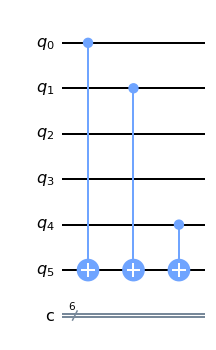

In [10]:
def make_uf(s):
    n = len(s) 
    circuit = QuantumCircuit(n + 1, n + 1)
    
    for i, v in enumerate(s):
        if v == '1':
            circuit.cx(i, n)
            
    return circuit
  
make_uf('11001').draw()

/tmp/ipykernel_80/439187245.py:10: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  circuit += uf


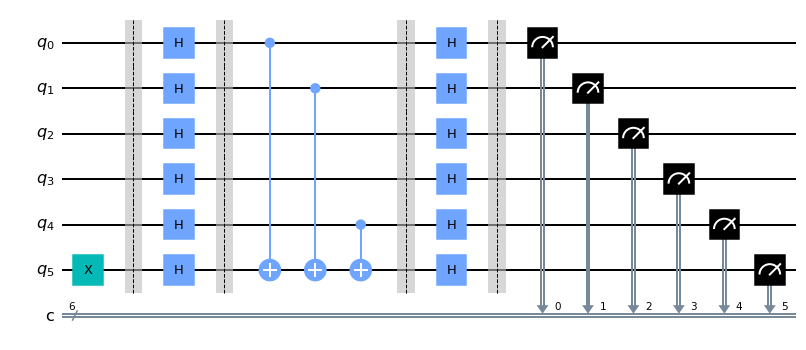

In [49]:
def bernstein_vazirani(uf, n):
    circuit = QuantumCircuit(n + 1, n + 1)
    circuit.x(n)
    circuit.barrier()
    
    for i in range(n + 1):
        circuit.h(i)
    circuit.barrier()
    
    circuit += uf
    circuit.barrier()
    
    for i in range(n + 1):
        circuit.h(i)
        
    circuit.barrier()
    
    for i in range(n + 1):
        circuit.measure(i, i)
        
    return circuit

bernstein_vazirani(make_uf('11001'), 5).draw()

In [39]:
def real_bernstein_vazirani(s):
    n = len(s)
    circuit = bernstein_vazirani(make_uf(s), n)
    backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n + 1) and
                                       not x.configuration().simulator and x.status().operational==True))
    print("least busy backend: ", backend)
    

    transpiled = transpile(circuit, backend, optimization_level=3)
    job = backend.run(transpiled)
    job_monitor(job, interval=2)
    
    results = job.result()
    answer = results.get_counts()

    return plot_histogram(answer)


def simulate_bernstein_vazirani(s):
    n = len(s)
    circuit = bernstein_vazirani(make_uf(s), n)
    
    aer_sim = Aer.get_backend('aer_simulator')
    transpiled = transpile(circuit, aer_sim)

    qobj = assemble(transpiled, aer_sim)
    results = aer_sim.run(qobj).result()
    answer = results.get_counts()

    return plot_histogram(answer)

/tmp/ipykernel_80/1440278574.py:10: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  circuit += uf


least busy backend:  ibmq_belem
Job Status: job has successfully run


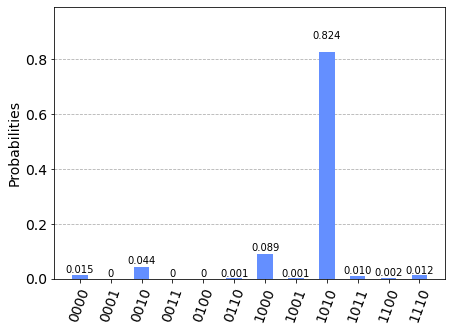

In [40]:
real_bernstein_vazirani('010')

/tmp/ipykernel_80/1440278574.py:10: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  circuit += uf


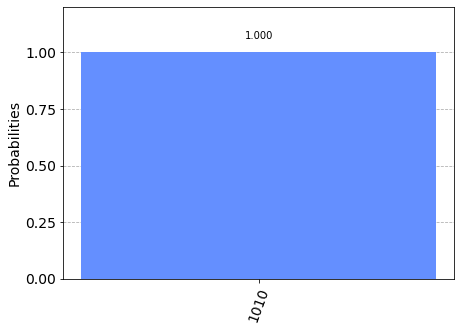

In [47]:
simulate_bernstein_vazirani('010')

/tmp/ipykernel_80/1440278574.py:10: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  circuit += uf


least busy backend:  ibmq_lima
Job Status: job has successfully run


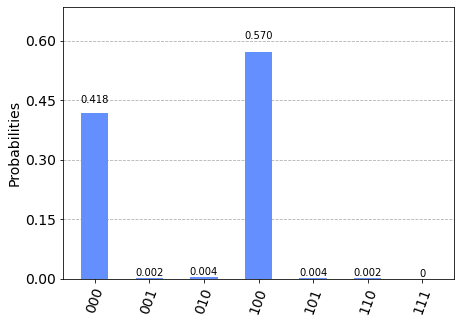

In [43]:
real_bernstein_vazirani('00')

/tmp/ipykernel_80/1440278574.py:10: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  circuit += uf


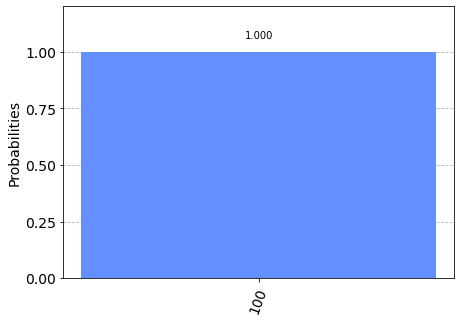

In [48]:
simulate_bernstein_vazirani('00')